In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [102]:
conn = sqlite3.connect(r'C:\Users\Shashank Sundi\Desktop\I neuron\assignments\ML Project-1 (regression Classification)\football data database\database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [3]:
pd.read_sql_query("SELECT * FROM Player", conn)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [4]:
pd.read_sql_query("SELECT * FROM Player_Attributes", conn).head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
pd.read_sql_query("SELECT * FROM Match", conn).head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
pd.read_sql_query("SELECT * FROM League", conn).head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
pd.read_sql_query("SELECT * FROM Team", conn).head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [103]:
pd.read_sql_query("SELECT * FROM Team_Attributes", conn).head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [9]:
pd.read_sql_query("SELECT * FROM Country", conn).head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [104]:
data=pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [105]:
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [106]:
#rearranging data and removing date column , id column

data=data[['id', 'player_fifa_api_id', 'player_api_id',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes','overall_rating']]
data.index=data.id
data=data.drop(['id'],axis=1)

In [107]:
data.head()

,player_fifa_api_id,player_api_id,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,218353,505942,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
3,218353,505942,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
4,218353,505942,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
5,218353,505942,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


In [108]:
data.dtypes

player_fifa_api_id       int64
player_api_id            int64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing

In [71]:
a=data.dtypes[data.dtypes=='object'].index
data[a].describe()

,preferred_foot,attacking_work_rate,defensive_work_rate
count,183142,180748,183142
unique,2,8,19
top,right,medium,medium
freq,138409,125070,130846


In [109]:
data.drop(['player_fifa_api_id','player_api_id'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
potential,183142.0,73.460353,6.592271,39.0,69.0,74.0,78.0,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.0,59.0,68.0,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.0,53.0,65.0,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.0,60.0,68.0,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.0,65.0,72.0,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.0,52.0,64.0,93.0
dribbling,183142.0,59.175154,17.744688,1.0,52.0,64.0,72.0,97.0
curve,181265.0,52.965675,18.255788,2.0,41.0,56.0,67.0,94.0
free_kick_accuracy,183142.0,49.380950,17.831746,1.0,36.0,50.0,63.0,97.0
long_passing,183142.0,57.069880,14.394464,3.0,49.0,59.0,67.0,97.0


In [73]:
data.shape

(183978, 40)

In [74]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling         

In [110]:
data.isnull().sum()[data.isnull().sum()==2713].index

Index(['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision',
       'sliding_tackle'],
      dtype='object')

In [111]:
a=data.isnull().sum()[data.isnull().sum()==2713].index

In [112]:
numericcal_index=data.dtypes[data.dtypes!='object'].index

In [113]:
object_index=data.dtypes[data.dtypes=='object'].index

In [114]:
object_index

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [115]:
# Imputing Null values in Categorical Variables----Random Sample Imputation

for col in object_index:
            rand_sample=data[col].dropna().sample(data[col].isnull().sum(),random_state=1)
            rand_sample.index=data[data[col].isnull()].index
            data.loc[data[col].isnull(),col]=rand_sample

In [116]:
a

Index(['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision',
       'sliding_tackle'],
      dtype='object')

In [117]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10,weights='distance')

#imputing features with null values = 2713
#we observe that most of the features have same number of missing values = 836 ,which belong to the same set of observations.
#We dont want these features as they have mostly , no information at all.So, we drop them using dropna(). 
#However ,there are a small number of features with null values=2173 , which might be significant.
#But if we drop the obs. before imputing features with null values=2173 , we might lose some info they might be containing.
#So, we first impute features ,with comparatively significant observations and then drop the observations with null values.

for col in a:
    data[[col]]=imputer.fit_transform(data[[col]])


In [118]:
# No. of null values for attacking_work_rate=3230
data.attacking_work_rate.fillna(data.attacking_work_rate.mode(),inplace=True)

In [119]:
data.isnull().sum()

player_fifa_api_id       0
player_api_id            0
potential              836
preferred_foot           0
attacking_work_rate      0
defensive_work_rate      0
crossing               836
finishing              836
heading_accuracy       836
short_passing          836
volleys                  0
dribbling              836
curve                    0
free_kick_accuracy     836
long_passing           836
ball_control           836
acceleration           836
sprint_speed           836
agility                  0
reactions              836
balance                  0
shot_power             836
jumping                  0
stamina                836
strength               836
long_shots             836
aggression             836
interceptions          836
positioning            836
vision                   0
penalties              836
marking                836
standing_tackle        836
sliding_tackle           0
gk_diving              836
gk_handling            836
gk_kicking             836
g

In [120]:
#dropped observations with null values

data=data.dropna()
data.isnull().sum()

player_fifa_api_id     0
player_api_id          0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
overall_rating         0


In [121]:
#Exporting Cleaned data for later use
data.to_csv("Cleaned_database_data.csv",index=False)

In [86]:
object_index

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [87]:
#Frequency Encodig of attacking and defensive work rate
#One hot encoding of preferred foot

attacking_rate_map=data.attacking_work_rate.value_counts().to_dict()
defensive_rate_map=data.defensive_work_rate.value_counts().to_dict()

data.preferred_foot=pd.get_dummies(data.preferred_foot,drop_first=True)  # right=1 , left=0
data.attacking_work_rate=data.attacking_work_rate.map(attacking_rate_map)
data.defensive_work_rate=data.defensive_work_rate.map(defensive_rate_map)

In [88]:
data

,player_fifa_api_id,player_api_id,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,71.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,218353,505942,71.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
3,218353,505942,66.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
4,218353,505942,65.0,1,126723,130846,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
5,218353,505942,65.0,1,126723,130846,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183974,102359,39902,85.0,1,126723,18432,84.0,77.0,59.0,89.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,83.0
183975,102359,39902,80.0,1,126723,18432,74.0,76.0,53.0,84.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,78.0
183976,102359,39902,80.0,1,126723,18432,74.0,71.0,53.0,84.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,77.0


In [89]:
#visualizing the data
len(numericcal_index)

37

In [90]:
numericcal_index

Index(['player_fifa_api_id', 'player_api_id', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'overall_rating'],
      dtype='object')

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

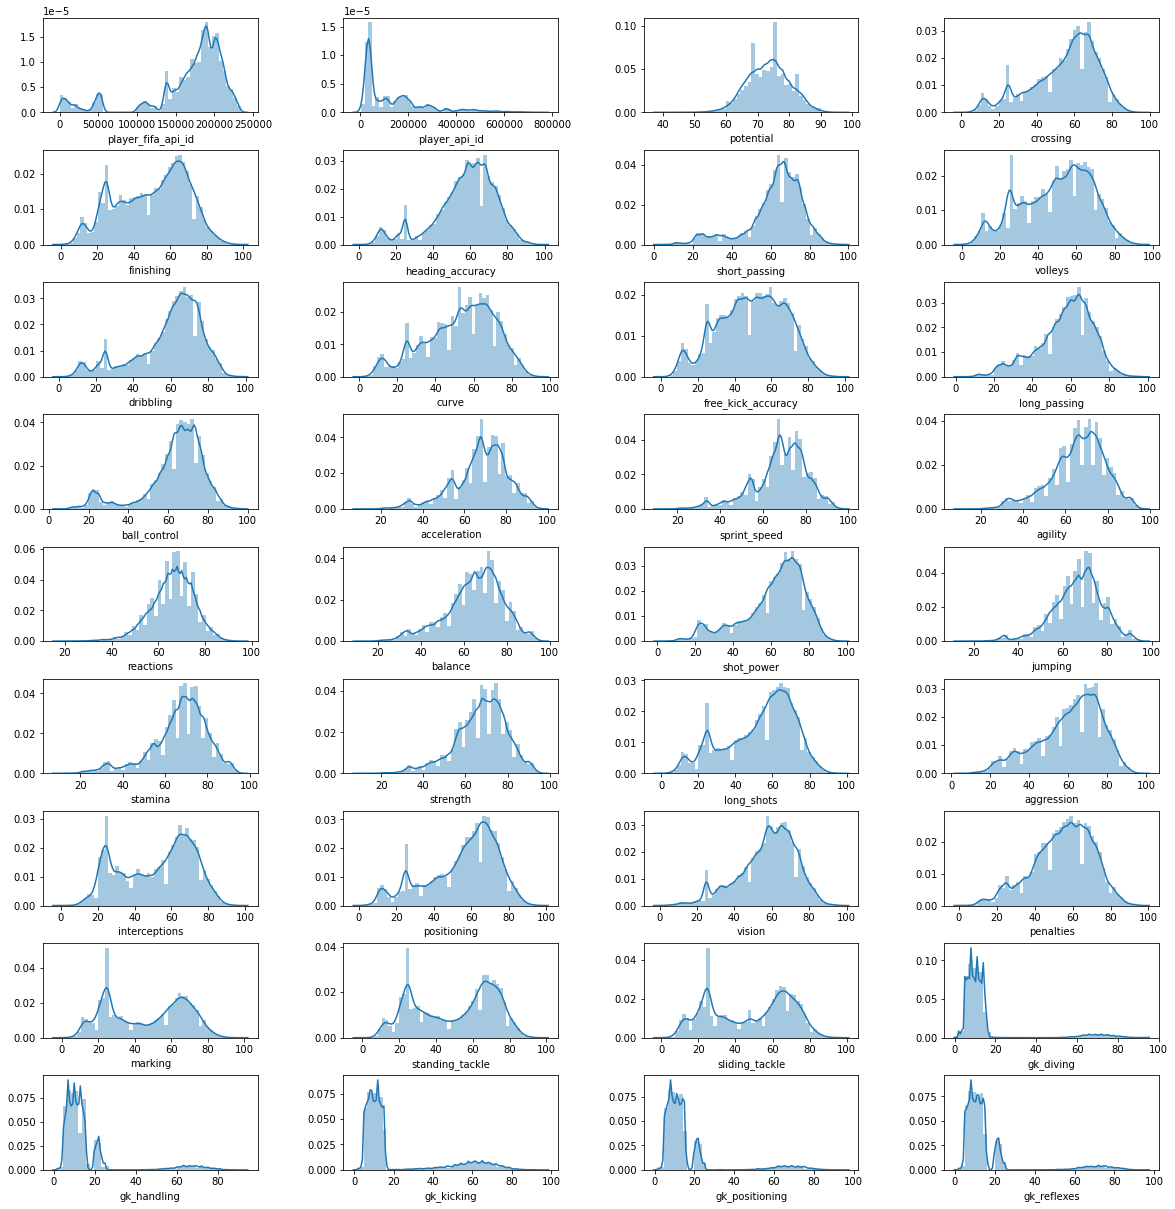

In [36]:
fig,ax=plt.subplots(9,4,figsize=(20,20))
plt.subplots_adjust(bottom=0.1,  
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
a=0
b=0
for i in numericcal_index:
    if i=='overall_rating':
        continue
    sns.distplot(data.drop(['overall_rating'],axis=1)[i],ax=ax[a,b])
    #ax[a,b].set_title(i)
    b+=1
    if b==4:
        b=0
        a+=1


In [37]:
#We can observe that values of features-- 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'  are definitely not normally distributed
#Distrbutions of marking , standing tackle , sliding_tacke seem to be bimodal

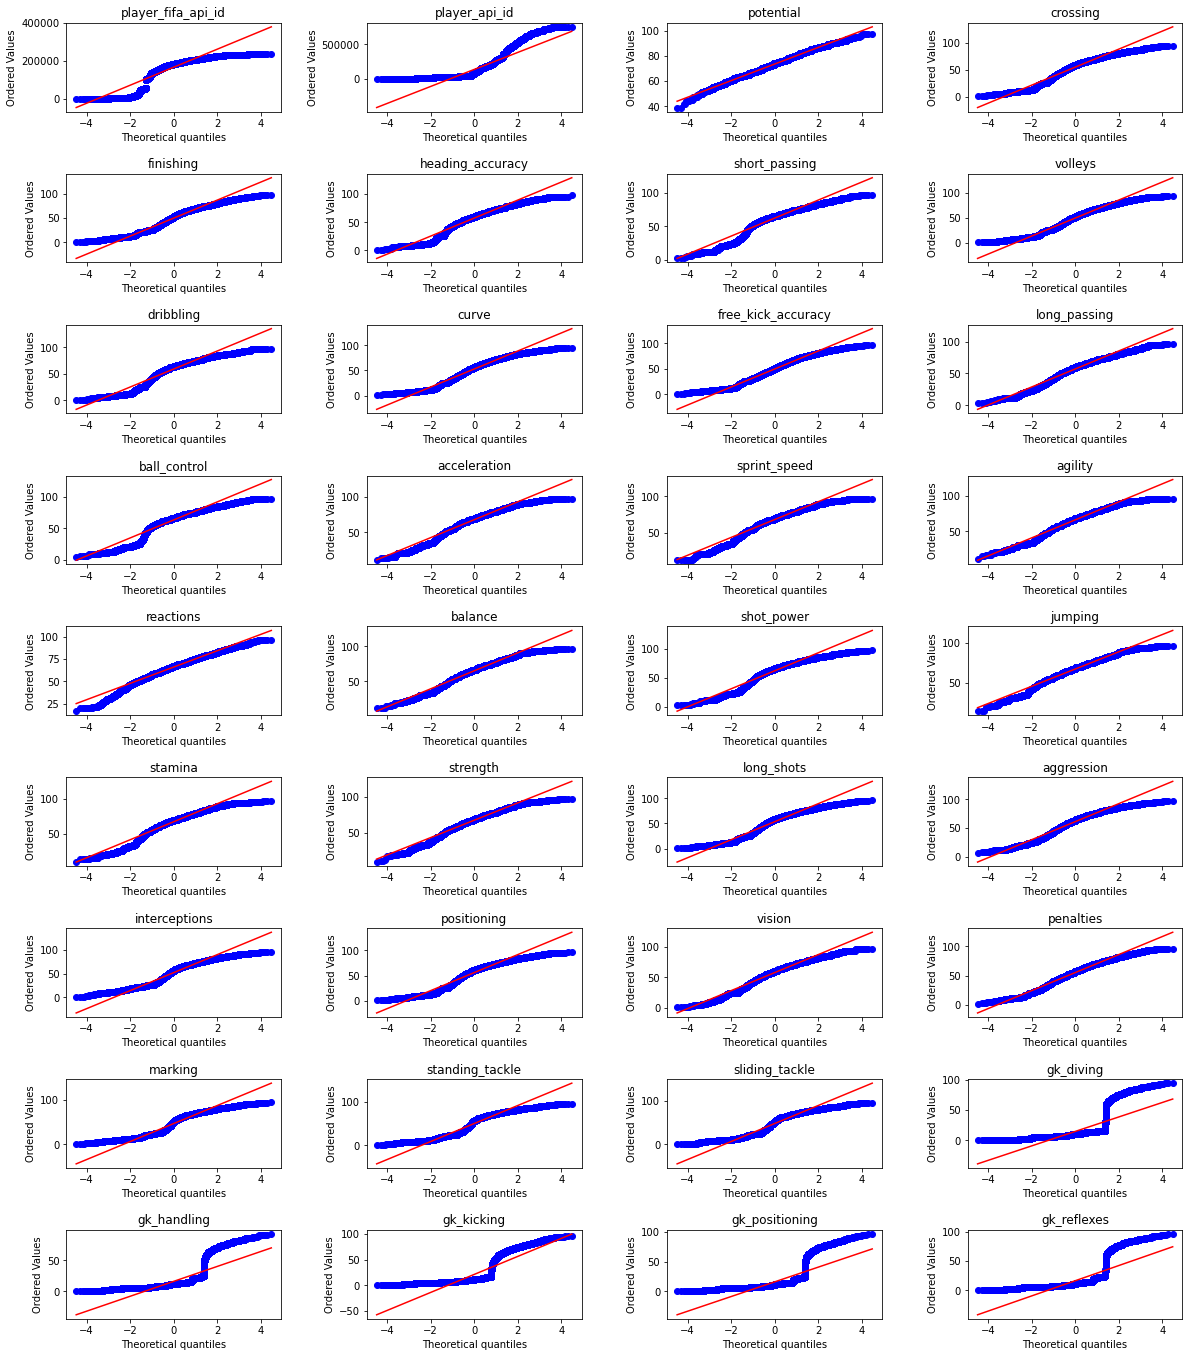

In [38]:
from scipy import stats
fig,ax=plt.subplots(9,4,figsize=(20,20))
plt.subplots_adjust(bottom=0,  
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
a=0
b=0
for i in numericcal_index:
    if i=='overall_rating':
        continue
    stats.probplot(data.drop(['overall_rating'],axis=1)[i],plot=ax[a,b])
    ax[a,b].set_title(i)
    b+=1
    if b==4:
        b=0
        a+=1

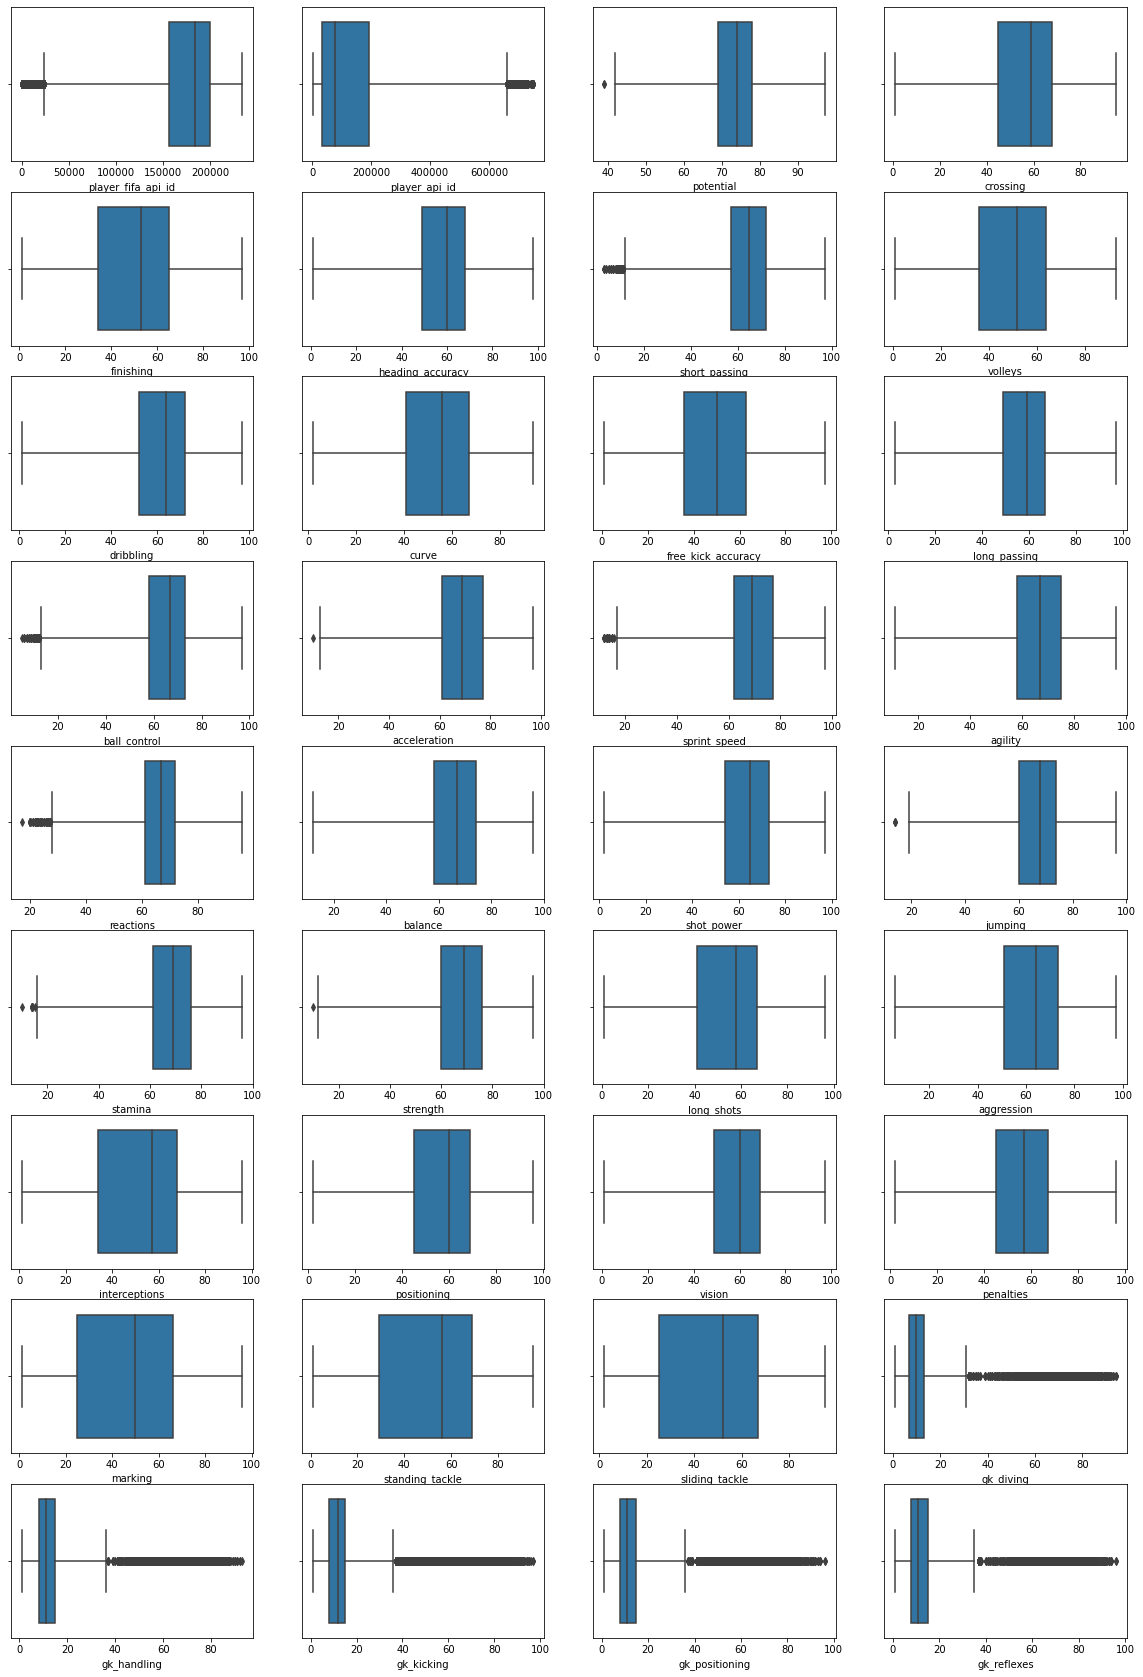

In [39]:
fig,ax=plt.subplots(9,4,figsize=(20,30))

a=0
b=0
for i in numericcal_index:
    if i=='overall_rating':
        continue
    sns.boxplot(data.drop(['overall_rating'],axis=1)[i],ax=ax[a,b],whis=3)
    #ax[a,b].set_title(i)
    b+=1
    if b==4:
        b=0
        a+=1

In [40]:
data.head()

,player_fifa_api_id,player_api_id,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,71.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,218353,505942,71.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
3,218353,505942,66.0,1,126723,130846,49.0,44.0,71.0,61.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
4,218353,505942,65.0,1,126723,130846,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
5,218353,505942,65.0,1,126723,130846,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


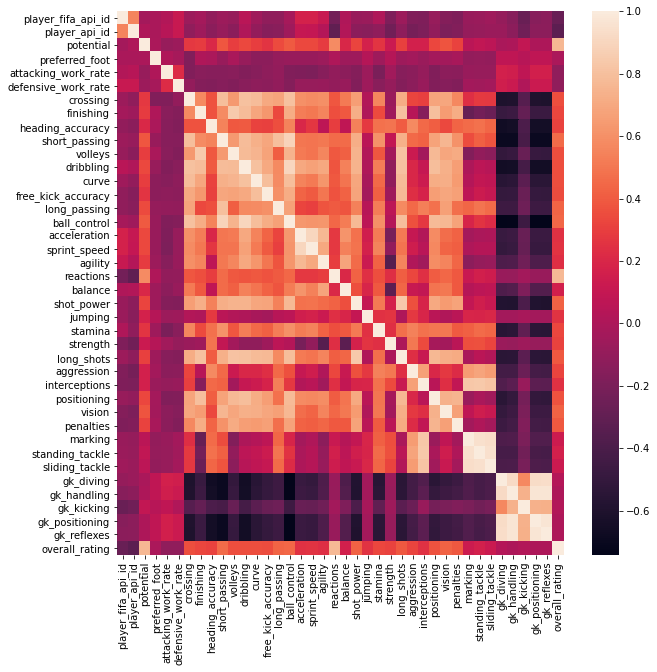

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [91]:
def correlation(data,threshold):
    col_corr=set()
    cor=data.corr()
    for i in range(len(cor.columns)):
        for j in range(len(cor.columns)):
            if (abs(cor.iloc[i,j]) > threshold) and i!=j:
                if (cor.columns[j] in col_corr) or (cor.columns[i] in col_corr):
                    continue
                print("\n",cor.columns[i],"-----",cor.columns[j])
                print(abs(cor.iloc[i,j]))
                colname=cor.columns[i]
                col_corr.add(colname)
    return col_corr

a=correlation(data.drop('overall_rating',axis=1),0.85)
print('\n',a)



 short_passing ----- ball_control
0.8900416924366221

 dribbling ----- ball_control
0.9007676656782179

 acceleration ----- sprint_speed
0.9044869031369268

 marking ----- standing_tackle
0.9501336912446234

 standing_tackle ----- sliding_tackle
0.9488068802960467

 gk_diving ----- gk_handling
0.9251602655809323

 gk_handling ----- gk_positioning
0.9663005139500525

 gk_positioning ----- gk_reflexes
0.9667111235984718

 {'standing_tackle', 'gk_diving', 'marking', 'dribbling', 'gk_positioning', 'acceleration', 'short_passing', 'gk_handling'}


In [92]:
data=data.drop(['standing_tackle', 'short_passing', 'acceleration', 'gk_diving', 'gk_handling', 'dribbling', 'marking', 'gk_positioning'],axis=1)

In [93]:
data=data.drop(['player_fifa_api_id','player_api_id'],axis=1)
data.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,...,long_shots,aggression,interceptions,positioning,vision,penalties,sliding_tackle,gk_kicking,gk_reflexes,overall_rating
id,,,,,,,,,,,,,,,,,,,,,
1,71.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,35.0,71.0,70.0,45.0,54.0,48.0,69.0,10.0,8.0,67.0
2,71.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,35.0,71.0,70.0,45.0,54.0,48.0,69.0,10.0,8.0,67.0
3,66.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,35.0,63.0,41.0,45.0,54.0,48.0,69.0,10.0,8.0,62.0
4,65.0,1,126723,130846,48.0,43.0,70.0,43.0,44.0,38.0,...,34.0,62.0,40.0,44.0,53.0,47.0,66.0,9.0,7.0,61.0
5,65.0,1,126723,130846,48.0,43.0,70.0,43.0,44.0,38.0,...,34.0,62.0,40.0,44.0,53.0,47.0,66.0,9.0,7.0,61.0


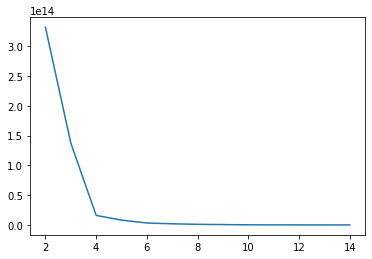

In [45]:
from sklearn.cluster import KMeans
Inertia=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    Inertia.append(kmeans.inertia_)
    
elbow=pd.DataFrame({'Cluster':range(2,15),'Inertia':Inertia})
plt.plot(elbow.Cluster,elbow.Inertia)

In [46]:
#Clustering data to fit separate models on the different clusters , so that model generalises well

kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(data)
data['Cluster']=kmeans.predict(data)
data.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,...,aggression,interceptions,positioning,vision,penalties,sliding_tackle,gk_kicking,gk_reflexes,overall_rating,Cluster
id,,,,,,,,,,,,,,,,,,,,,
1,71.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,69.0,10.0,8.0,67.0,0
2,71.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,69.0,10.0,8.0,67.0,0
3,66.0,1,126723,130846,49.0,44.0,71.0,44.0,45.0,39.0,...,63.0,41.0,45.0,54.0,48.0,69.0,10.0,8.0,62.0,0
4,65.0,1,126723,130846,48.0,43.0,70.0,43.0,44.0,38.0,...,62.0,40.0,44.0,53.0,47.0,66.0,9.0,7.0,61.0,0
5,65.0,1,126723,130846,48.0,43.0,70.0,43.0,44.0,38.0,...,62.0,40.0,44.0,53.0,47.0,66.0,9.0,7.0,61.0,0


In [47]:
data.Cluster.value_counts()
# data clusters , in this scenario is useless
# above point is proved by the fact that we are getting xgboost as model for all clusters of data 

0    97154
2    33692
1    29569
3    22727
Name: Cluster, dtype: int64

In [48]:
data_c1=data[data.Cluster==0].copy(deep=True)
data_c2=data[data.Cluster==1].copy(deep=True)
data_c3=data[data.Cluster==2].copy(deep=True)
data_c4=data[data.Cluster==3].copy(deep=True)

In [49]:
#Alternate Clustering procedure--intution based

"""data_c1=data[data.overall_rating>80]
data_c2=data[data.overall_rating>50][data.overall_rating<80]
data_c3=data[data.overall_rating>30][data.overall_rating<50]
data_c4=data[data.overall_rating>0][data.overall_rating<30]"""

'data_c1=data[data.overall_rating>80]\ndata_c2=data[data.overall_rating>50][data.overall_rating<80]\ndata_c3=data[data.overall_rating>30][data.overall_rating<50]\ndata_c4=data[data.overall_rating>0][data.overall_rating<30]'

In [50]:
# Regression models to try
"""LInear regression , lasso / regularised ,SVM regressor, decision tree regressor , KNN
XGB regressor(boosting) , rand forest regressor(bagging) , Stacking"""

'LInear regression , lasso / regularised ,SVM regressor, decision tree regressor , KNN\nXGB regressor(boosting) , rand forest regressor(bagging) , Stacking'

In [51]:
#Trying LInear Regression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , RepeatedStratifiedKFold           
from sklearn.linear_model import LinearRegression
scores_linreg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            #cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
            #scores=cross_val_score(linreg,X,y,cv=cv,scoring='r2')
            #r2=np.mean(scores)
            
            linreg=LinearRegression()
            linreg.fit(X_train,y_train)
            r2=linreg.score(X_test,y_test)
            scores_linreg.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_linreg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_linreg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_linreg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_linreg[3]}")

r2 score for Data Cluster 1 : 0.8076979927476982
r2 score for Data Cluster 2 : 0.837002657007973
r2 score for Data Cluster 3 : 0.8628820396702764
r2 score for Data Cluster 4 : 0.8446429061904619


In [52]:
#Trying Out Elastic Net Regression

from sklearn.linear_model import ElasticNetCV ,ElasticNet
scores_elasticreg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            elasticCV=ElasticNetCV(alphas=None,cv=10)
            elasticCV.fit(X_train,y_train)
            elastic_net_reg=ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.01)
            elastic_net_reg.fit(X_train,y_train)
            r2=elastic_net_reg.score(X_test,y_test)
            scores_elasticreg.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_elasticreg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_elasticreg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_elasticreg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_elasticreg[3]}")

r2 score for Data Cluster 1 : 0.8077805738818233
r2 score for Data Cluster 2 : 0.8264716107984909
r2 score for Data Cluster 3 : 0.8493124876269141
r2 score for Data Cluster 4 : 0.7621111935631149


In [53]:
#Trying Out Ridge Regression

from sklearn.linear_model import RidgeCV ,Ridge
scores_ridgereg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            alphas=np.random.uniform(low=0,high=10,size=(50,))
            ridgeCV=RidgeCV(alphas=alphas,cv=10)
            ridgeCV.fit(X_train,y_train)
            ridge_reg=Ridge(alpha=ridgeCV.alpha_)
            ridge_reg.fit(X_train,y_train)
            r2=ridge_reg.score(X_test,y_test)
            scores_ridgereg.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_ridgereg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_ridgereg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_ridgereg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_ridgereg[3]}")

r2 score for Data Cluster 1 : 0.8077627536329297
r2 score for Data Cluster 2 : 0.837002991437798
r2 score for Data Cluster 3 : 0.8628820786180462
r2 score for Data Cluster 4 : 0.8446425931053141


In [54]:
#Trying Out Support Vector Regression
#Using LinearSVR instead of SVR , cuz we have alarge no. of samples

from sklearn.svm import LinearSVR,SVR
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scores_SVM_reg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            scaler.fit(i.drop(['overall_rating'],axis=1))
            X=scaler.transform(i.drop(['overall_rating'],axis=1))
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            svm_reg=LinearSVR()
            svm_reg.fit(X_train,y_train)
            r2=svm_reg.score(X_test,y_test)
            scores_SVM_reg.append((r2))
            j+=1
            
            
print(f"r2 score for Data Cluster 1 : {scores_SVM_reg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_SVM_reg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_SVM_reg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_SVM_reg[3]}")

r2 score for Data Cluster 1 : 0.8055447529001716
r2 score for Data Cluster 2 : 0.8332427474486518
r2 score for Data Cluster 3 : 0.8618849280456551
r2 score for Data Cluster 4 : 0.8418793504052726


In [55]:
#Trying Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.metrics import r2_score

scores_dtree_reg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            dtree_reg=DecisionTreeRegressor()
            dtree_reg.fit(X_train,y_train)
            pred=dtree_reg.predict(X_test)
            r2=r2_score(y_test,pred)
            scores_dtree_reg.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_dtree_reg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_dtree_reg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_dtree_reg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_dtree_reg[3]}")

r2 score for Data Cluster 1 : 0.9437713697884517
r2 score for Data Cluster 2 : 0.9377083569051813
r2 score for Data Cluster 3 : 0.9469955708763392
r2 score for Data Cluster 4 : 0.9284485035884089


In [56]:
#Trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

scores_rand_forest=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            rand_forest=RandomForestRegressor(min_samples_leaf=10,n_estimators=30)
            rand_forest.fit(X_train,y_train)
            pred=rand_forest.predict(X_test)
            r2=r2_score(y_test,pred)
            scores_rand_forest.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_rand_forest[0]}")
print(f"r2 score for Data Cluster 2 : {scores_rand_forest[1]}")
print(f"r2 score for Data Cluster 3 : {scores_rand_forest[2]}")
print(f"r2 score for Data Cluster 4 : {scores_rand_forest[3]}")

r2 score for Data Cluster 1 : 0.9558328947968748
r2 score for Data Cluster 2 : 0.9489344513014933
r2 score for Data Cluster 3 : 0.9620063740385323
r2 score for Data Cluster 4 : 0.9534228282437427


In [59]:
#Trying XGBoost Regressor

from xgboost import XGBRegressor ,XGBRFRegressor

scores_xgb=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            X=i.drop(['overall_rating'],axis=1)
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
            xgb_reg.fit(X_train,y_train)
            pred=xgb_reg.predict(X_test)
            r2=r2_score(y_test,pred)
            scores_xgb.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_xgb[0]}")
print(f"r2 score for Data Cluster 2 : {scores_xgb[1]}")
print(f"r2 score for Data Cluster 3 : {scores_xgb[2]}")
print(f"r2 score for Data Cluster 4 : {scores_xgb[3]}")

r2 score for Data Cluster 1 : 0.9665674447701496
r2 score for Data Cluster 2 : 0.9699383584751291
r2 score for Data Cluster 3 : 0.9747019368523618
r2 score for Data Cluster 4 : 0.9748251402347369


In [58]:
#Trying KNN Regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scores_KNN_reg=[]
j=1
for i in [data_c1,data_c2,data_c3,data_c4]:
            scaler.fit(i.drop(['overall_rating'],axis=1))
            X=scaler.transform(i.drop(['overall_rating'],axis=1))
            y=i.overall_rating
            X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
            knn=KNeighborsRegressor(n_neighbors=7)
            knn.fit(X_train,y_train)
            r2=knn.score(X_test,y_test)
            scores_KNN_reg.append((r2))
            j+=1
            
print(f"r2 score for Data Cluster 1 : {scores_KNN_reg[0]}")
print(f"r2 score for Data Cluster 2 : {scores_KNN_reg[1]}")
print(f"r2 score for Data Cluster 3 : {scores_KNN_reg[2]}")
print(f"r2 score for Data Cluster 4 : {scores_KNN_reg[3]}")

r2 score for Data Cluster 1 : 0.9247346375552699
r2 score for Data Cluster 2 : 0.9197564271042877
r2 score for Data Cluster 3 : 0.9355487374879397
r2 score for Data Cluster 4 : 0.9249160258531123


In [60]:
scores=pd.DataFrame([scores_linreg,scores_elasticreg,scores_ridgereg,scores_SVM_reg,scores_dtree_reg,scores_rand_forest,scores_KNN_reg,scores_xgb]
             ,index=['Linreg-r2','Elastic-net r2','Ridge-r2','SVR-r2','Dtree-r2','Rand-Forest-r2','KNN-r2',"XGB-r2"],
             columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
scores

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Linreg-r2,0.807698,0.837003,0.862882,0.844643
Elastic-net r2,0.807781,0.826472,0.849312,0.762111
Ridge-r2,0.807763,0.837003,0.862882,0.844643
SVR-r2,0.805545,0.833243,0.861885,0.841879
Dtree-r2,0.943771,0.937708,0.946996,0.928449
Rand-Forest-r2,0.955833,0.948934,0.962006,0.953423
KNN-r2,0.924735,0.919756,0.935549,0.924916
XGB-r2,0.966567,0.969938,0.974702,0.974825


In [123]:
#Didn't use stacking because it was giving only a slightly better result for a much high computational consumption , than xgb

In [61]:
for i in scores.columns:
    print(f"Best Model for {i} : {scores[i].idxmax()} ")

#Apparently best model for all clusters is XGBoost

Best Model for Cluster 1 : XGB-r2 
Best Model for Cluster 2 : XGB-r2 
Best Model for Cluster 3 : XGB-r2 
Best Model for Cluster 4 : XGB-r2 


In [62]:
X=data.drop(['overall_rating','Cluster'],axis=1)
y=data.overall_rating
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

xgb_reg=XGBRegressor(subsample=0.7,max_depth=9,colsample_bytree=0.8,eta=0.1)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
import pickle
filename="xgboost.pickle"
pickle.dump(xgb_reg,open(filename,'wb'))

In [64]:
model=pickle.load(open(filename,'rb'))
pred=model.predict(X_test)
r2_score(y_test,pred)

0.9658478300287578